In [1]:
! pip install nltk
! pip install pandas
! pip install scikit-learn
! pip install tensorflow[and-cuda]


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from string import punctuation
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\viswa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\viswa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\viswa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
train_df = pd.read_csv('Dataset/train.csv')

In [4]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
# %%capture
def data_cleanup(train_df):
    train_df['text'] = train_df['text'].str.lower()
    train_df['text'] = train_df['text'].str.strip()
    train_df['text'] = train_df['text'].replace(to_replace ='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='\?*', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='(RT|rt)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='@[a-z,_]*', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='([0-9]*:[0-9]*)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='([0-9]*\.[0-9]*)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='(utc|gmt)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='_[\S]', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='&amp;?', value = 'and', regex = False)
    train_df['text'] = train_df['text'].replace(to_replace ='&lt;', value = '<', regex = False)
    train_df['text'] = train_df['text'].replace(to_replace ='&gt;', value = '>', regex = False)
    train_df['text'] = train_df['text'].replace(to_replace ='[ ]{2, }', value = ' ', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='([^\w\d ]+)', value = '', regex = True)
    return train_df['text']

In [6]:
# %%capture
train_df['text'] = data_cleanup(train_df)

In [7]:
#Split training dataset
tweet_texts = train_df['text']
class_labels = train_df['target']
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweet_texts,class_labels,test_size=0.2, random_state=42, stratify=class_labels)
train_tweets, validation_tweets, train_labels, validation_labels = train_test_split(train_tweets, train_labels, test_size = 0.2, random_state = 42, stratify=train_labels)

In [8]:
# train_tweets = train_tweets.str.cat().lower()
# validation_tweets = validation_tweets.str.cat().lower()
# test_tweets = test_tweets.str.cat().lower()


In [9]:
#Text Preprocessor
def preprocessing(text):
   word_lemma = []
   tweet_tokenize = TweetTokenizer()
   tokens = tweet_tokenize.tokenize((text).lower())
   tokens = [w for w in tokens if w not in punctuation and not w.isdigit() and not len(w) < 3]
   stop_words = stopwords.words ('english')
   tweet_without_stopwords = [t for t in tokens if t not in stop_words]
   text = " ".join (tweet_without_stopwords)
   word_lemma = [WordNetLemmatizer().lemmatize(t) for t in tweet_tokenize.tokenize(text)]
   pp_text = " ".join (word_lemma)
   return pp_text

In [10]:
def get_performance_score(actual_label : list, predicted_label : list):
    '''Function to calculate the performance metric using sklearn.
    
    Parameters
    ----------
    actual_label : list
      Actual(Ground Truth) class label from the dataset.
    predicted_label : pd.DataFrame
      Class label predicted by the model
    
    Return
    ------
    f1_score : float
    accuracy : float
    precision : float
    recall : float
    AUROC : float
    '''
    precision = metrics.precision_score(actual_label, predicted_label, pos_label=1)
    recall = metrics.recall_score(actual_label, predicted_label,pos_label=1)
    AUROC = metrics.roc_auc_score(actual_label, predicted_label)
    accuracy = metrics.accuracy_score(actual_label, predicted_label)
    f1_score = metrics.f1_score(actual_label, predicted_label,pos_label=1)
    confusion_mat = metrics.confusion_matrix(actual_label, predicted_label)
    metrics_list = [f1_score, accuracy, precision, recall, AUROC]
    metrics_list = pd.DataFrame(metrics_list).T
    metrics_df = metrics_list.rename(columns={0:'F1',1:'Accuracy',2:'Precision',3:'Recall',4:'AUROC'})
    return metrics_df, confusion_mat

In [76]:
def plot_confusion_matrix(confusion_mat, model_name):
    cm_matplot, cm_ax = plt.subplots(facecolor='#212936')
    # cm_ax.text(color='white')
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['not_disaster','disaster'])
    title = model_name + " Confusion Matrix"
    cm_plot.plot(cmap=plt.cm.Greens, ax=cm_ax)
    plt.title(title)
    plt.show()

In [12]:
#preprocessing
# train_tweets = preprocessing(train_tweets)
# validation_tweets = preprocessing(validation_tweets)
# test_tweets = preprocessing(test_tweets)

## Variable definitions
 - train_tweets - Preprocessed tweets for training
 - test_tweets - Preprocessed tweets for testing
 - train_labels - class label for training tweets
 - test_labels - class label for test tweets

## Baseline
1. Implement traditional model(MultinomialNB, LogisticRegression, SVC, KNeighborsClassifier) from sklearn
2. Train and test the default model without tuning hyperparameter values
3. Use grid search(GridSearchCV) from sklearn to identify best values for hyperparameters
4. Train the model with best hypermeter values and test it on test set(test_tweets)

# Preprocessing

In [13]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras

In [14]:
train_tweets=train_tweets.to_frame()
validation_tweets = validation_tweets.to_frame()
test_tweets = test_tweets.to_frame()

In [15]:
train_tweets['processed_text'] = train_tweets['text'].apply(preprocessing)
validation_tweets['processed_text'] = validation_tweets['text'].apply(preprocessing)
test_tweets['processed_text'] = test_tweets['text'].apply(preprocessing)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train_tweets['processed_text'])

X_train = vectorizer.transform(train_tweets['processed_text'])
X_val  = vectorizer.transform(validation_tweets['processed_text'])
X_test = vectorizer.transform(test_tweets['processed_text'])
# X_train

In [17]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, train_labels)
score = classifier.score(X_val, validation_labels)

# print("Accuracy:", score)

In [18]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 10)                107230    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 107241 (418.91 KB)
Trainable params: 107241 (418.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from keras.backend import clear_session
clear_session()

In [21]:
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()
history = model.fit(X_train, train_labels,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_val, validation_labels),
                    batch_size=10)

In [22]:
# loss, accuracy = model.evaluate(X_train, train_labels, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, validation_labels, verbose=False)
# print("Validation Accuracy:  {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, test_labels, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [23]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# def plot_history(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     x = range(1, len(acc) + 1)

#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(x, acc, 'b', label='Training acc')
#     plt.plot(x, val_acc, 'r', label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.legend()
#     plt.subplot(1, 2, 2)
#     plt.plot(x, loss, 'b', label='Training loss')
#     plt.plot(x, val_loss, 'r', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()

In [24]:
# plot_history(history)

In [25]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=18000)
tokenizer.fit_on_texts(train_tweets['processed_text'])

X_train = tokenizer.texts_to_sequences(train_tweets['processed_text'])
X_val = tokenizer.texts_to_sequences(validation_tweets['processed_text'])
X_test = tokenizer.texts_to_sequences(test_tweets['processed_text'])

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

# print(X_train)

In [26]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 128

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# print(X_train[0, :])

In [27]:
clear_session()

# RNN

In [28]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
# model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='gelu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 50)           536250    
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                        

In [29]:
# X_train = X_train.toarray()
# X_val = X_val.toarray()
# X_test = X_test.toarray()

history = model.fit(X_train, train_labels,
                    epochs=2,
                    verbose=False,
                    validation_data=(X_val, validation_labels),
                    batch_size=10)
# loss, accuracy = model.evaluate(X_train, train_labels, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, validation_labels, verbose=False)
# print("Validation Accuracy:  {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, test_labels, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [30]:
# plot_history(history)

In [31]:
import numpy as np

y_test = model.predict(X_test)
# y_test

48/48 [==============================] - 0s 1ms/step


In [32]:
y_test = np.where(y_test > 0.7, 1, 0)
y_test = y_test.flatten()

In [33]:
metrics_df_rnn, confusion_mat_rnn = get_performance_score(test_labels, y_test)

# CNN

In [34]:
# A integer input for vocab indices.
inputs = keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(20000, embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
# x = layers.Conv1D(128, 7, padding="valid", activation="softmax", strides=3)(x)
# x = layers.Conv1D(128, 7, padding="valid", activation="softmax", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 50)          1000000   
                                                                 
 dropout (Dropout)           (None, None, 50)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 128)         44928     
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         114816    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                             

In [35]:
history = model.fit(X_train, train_labels,
                    epochs=2,
                    verbose=False,
                    validation_data=(X_val, validation_labels),
                    batch_size=10)

In [36]:
# loss, accuracy = model.evaluate(X_train, train_labels, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, validation_labels, verbose=False)
# print("Validation Accuracy:  {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, test_labels, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [37]:
y_test = model.predict(X_test)

y_test = np.where(y_test > 0.7, 1, 0)
y_test = y_test.flatten()
metrics_df_cnn, confusion_mat_cnn = get_performance_score(test_labels, y_test)

48/48 [==============================] - 0s 3ms/step


In [38]:
# plot_history(history)

In [39]:
def consolidate_perf_score(models_list, perf_score_list):
  '''Function to consolidate the performance metrics of all the models(KNeighborsClassifier, RandomForestClassifier, LogisticRegression, MLPClassifier) 
  and return a pd.DataFrame.

    Parameters
    ----------
    models_list : list
      List of models.
    perf_score_list : list
      List of performance metrics data frame from various models.
      
    Return
    ------
    consolidated_metrics_df : pd.DataFrame
    '''
  
  consolidated_perf_score_df = pd.concat(perf_score_list)
  consolidated_perf_score_df = consolidated_perf_score_df.rename(columns={0:'F1',1:'Accuracy',2:'Precision',3:'Recall'})
  consolidated_perf_score_df.insert(0,'Model',models_list)
  return consolidated_perf_score_df

In [66]:
consolidate_perf_score(['rnn', 'cnn'], [metrics_df_rnn, metrics_df_cnn])

,Model,F1,Accuracy,Precision,Recall,AUROC
0,rnn,0.745937,0.804990,0.846602,0.666667,0.787879
0,cnn,0.690979,0.788575,0.927835,0.550459,0.759119


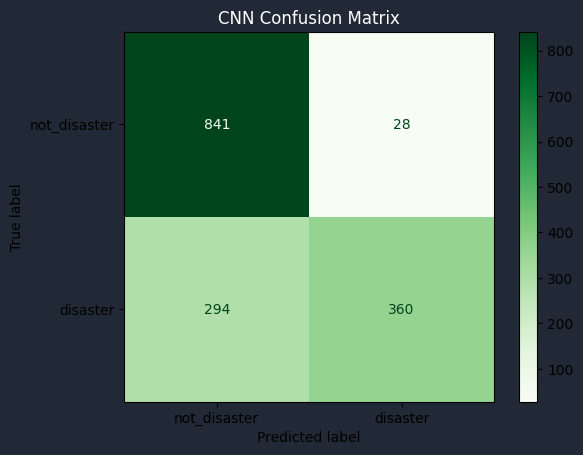

In [77]:
plot_confusion_matrix(confusion_mat_cnn, 'CNN')

TypeError: Axes.text() missing 3 required positional arguments: 'x', 'y', and 's'

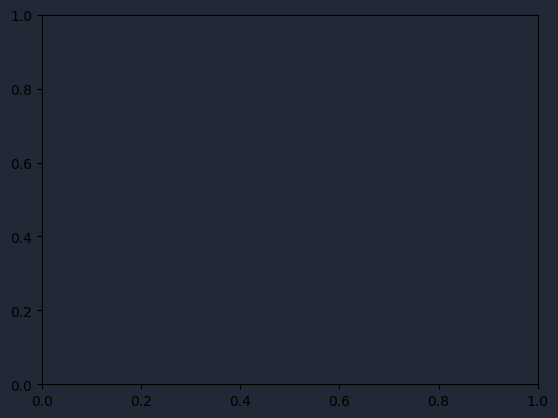

In [75]:
plot_confusion_matrix(confusion_mat_rnn, 'RNN')

In [51]:
plt.style.use('default')

In [74]:
plt.rcParams['text.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'